In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.1.2
    Uninstalling qiskit-2.1.2:
      Successfully uninstalled qiskit-2.1.2


In [ ]:
pip install qiskit_algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
pip install -U qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 40.9 MB/s eta 0:00:00


In [ ]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=223c046cf840fbdab76ab60824985e2022a4cbc3a6f863ddcc84b363f52ba330
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


Simulate Multi-Qubit IQ Dataset

In [ ]:
# Import standard libraries
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit_aer.primitives import Sampler
from qiskit.primitives import StatevectorSampler
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute as ComputeUncomputeAlgorithms
from qiskit_machine_learning.state_fidelities import ComputeUncompute as ComputeUncomputeML
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Import Scikit-learn libraries
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Import PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Import other libraries
from collections import Counter

In [ ]:
import numpy as np

def simulate_iq_dataset(n_qubits=3, n_samples_per_class=100, noise_std=0.1, center_distance=0.6, random_seed=50):
    rng = np.random.default_rng(random_seed)
    n_classes = 2 ** n_qubits
    X = []
    y = []

    # Define centers for qubit states with slight Q offset for better cluster separation
    q_offsets = {0: 0.1, 1: -0.1}
    centers = {
        0: np.array([ center_distance, q_offsets[0]]),
        1: np.array([-center_distance, q_offsets[1]])
    }

    # Covariance representing noise + crosstalk correlation
    cov = np.full((2*n_qubits, 2*n_qubits), 0.2)
    np.fill_diagonal(cov, noise_std**2)

    for label in range(n_classes):
        bits = np.array(list(np.binary_repr(label, width=n_qubits)), dtype=int)

        # Mean vector for this sample: concatenated centers for each qubit
        mean_vector = np.concatenate([centers[b] for b in bits])

        for _ in range(n_samples_per_class):
            # Generate noisy IQ vector with noise + crosstalk correlations
            # The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions.
            noisy_sample = rng.multivariate_normal(mean_vector, cov)
            X.append(noisy_sample)
            y.append(label)

    X = np.array(X)
    y = np.array(y)
    p = np.random.permutation(len(y))
    return X[p], y[p]

# Example usage:
n_qubits = 2
X, y = simulate_iq_dataset(n_qubits=n_qubits, n_samples_per_class=2000, noise_std=0.2, center_distance=0.9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


/tmp/ipython-input-1935373535.py:28: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  noisy_sample = rng.multivariate_normal(mean_vector, cov)


[ I₀, Q₀,  I₁, Q₁ ] --> |00>

In [ ]:
def visualize_iq_per_qubit(X, y, n_qubits):
    fig, axes = plt.subplots(1, n_qubits, figsize=(5*n_qubits,4))
    for q in range(n_qubits):
        iq = X[:, 2*q:2*q+2]
        ax = axes[q] if n_qubits>1 else axes
        scatter = ax.scatter(iq[:,0], iq[:,1], c=y, cmap="tab20", alpha=0.6, s=15)
        ax.set_xlabel("I")
        ax.set_ylabel("Q")
        ax.set_title(f"Qubit {q} IQ Data")
        legend = ax.legend(*scatter.legend_elements(), title="Labels", loc='best', fontsize='small')
        ax.add_artist(legend)
    plt.tight_layout()
    plt.show()

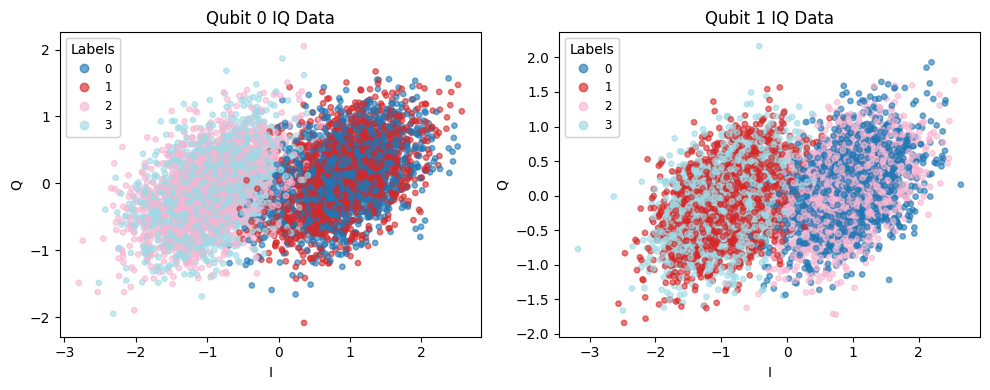

In [ ]:
visualize_iq_per_qubit(X_train, y_train, n_qubits)

Difficult to Classify Dataset - Ambigous class boundary line

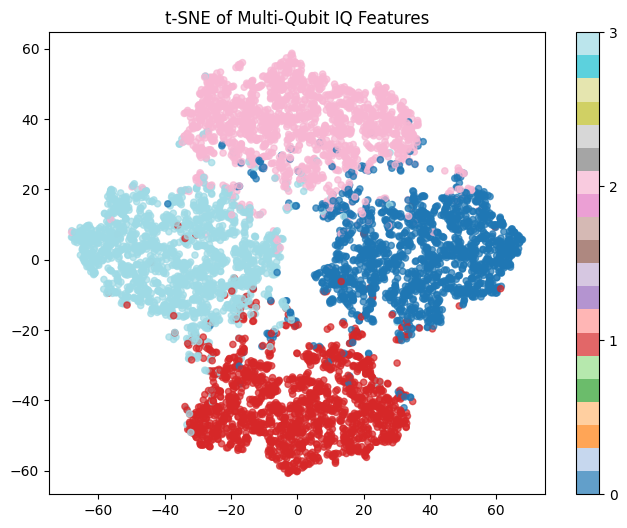

In [ ]:
def visualize_tsne(X, y):
    X_emb = TSNE(n_components=2, perplexity=50, random_state=42).fit_transform(X)
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_emb[:, 0], X_emb[:, 1], c=y, cmap="tab20" , s=20, alpha=0.7)
    plt.title("t-SNE of Multi-Qubit IQ Features")
    plt.colorbar(scatter, ticks=np.arange(2**3))
    plt.show()

visualize_tsne(X_train, y_train)

Define Trainable Feature Map and Quantum Kernel

Input dimension = 2 * number of qubits (IQ features for all qubits)
ZZFeatureMap that bind classical inputs to circuit parameters

trainable_params (ParameterVector): parameters optimized during QKT

data_params (ParameterVector): parameters symbolic for classical inputs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit.visualization import circuit_drawer

In [ ]:
# For active learning, split X_train into small labeled + pool (the pool is for demonstrations)
initial_train_size = 1000
X_train_init, X_pool, y_train_init, y_pool = train_test_split(X_train, y_train, train_size=initial_train_size, stratify=y_train, random_state=43)

# Examine unique values in pool
unique_values, counts = np.unique(y_pool, return_counts=True)
print(f"Unique values in y_pool: {unique_values}")
print(f"Counts of unique values in y_pool: {counts}")

# Examine unique values in entire training set
unique_values, counts = np.unique(y_train, return_counts=True)
print(f"Unique values in y_train: {unique_values}")
print(f"Counts of unique values in y_train: {counts}")

Unique values in y_pool: [0 1 2 3]
Counts of unique values in y_pool: [1350 1350 1350 1350]
Unique values in y_train: [0 1 2 3]
Counts of unique values in y_train: [1600 1600 1600 1600]


In [ ]:
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score, classification_report

def kd_tree_classify_accuracy(X_train, y_train, X_test, y_test, k=7):
    kd_tree = KDTree(X_train)
    dist, idxs = kd_tree.query(X_test, k=k)
    y_pred = []
    for neighbors in idxs:
        neighbor_labels = y_train[neighbors]
        vals, counts = np.unique(neighbor_labels, return_counts=True)
        y_pred.append(vals[np.argmax(counts)])
    y_pred = np.array(y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"KD-tree k-NN classifier accuracy (k={k}): {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))
    return acc, y_pred

print("KD-Tree on small labeled set (initial):")
k_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ]
best_k = None
best_acc = 0
for k in k_values:
  acc, y_pred = kd_tree_classify_accuracy(X_train_init, y_train_init, X_test, y_test, k=k)
  if acc > best_acc:
    best_acc = acc
    best_k = k

print(f"Best k-value: {best_k} with accuracy: {best_acc}")

print("\nKD-Tree on full training set:")
best_k = None
best_acc = 0
for k in k_values:
  acc, y_pred = kd_tree_classify_accuracy(X_train_init, y_train_init, X_pool, y_pool, k=k)
  if acc > best_acc:
    best_acc = acc
    best_k = k

print(f"Best k-value: {best_k} with accuracy: {best_acc}")


KD-Tree on small labeled set (initial):
KD-tree k-NN classifier accuracy (k=5): 0.9400
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       400
           1       0.93      0.94      0.94       400
           2       0.95      0.95      0.95       400
           3       0.94      0.94      0.94       400

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600

KD-tree k-NN classifier accuracy (k=6): 0.9406
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       400
           1       0.95      0.95      0.95       400
           2       0.94      0.94      0.94       400
           3       0.95      0.93      0.94       400

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      16

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

Quantum Kernel (QML)

In [ ]:
# Define and train SVM classifier ( kernel by default)
svm = SVC(kernel='linear', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_init, y_train_init)

# Prediction and performance
# Evaluate baseline performance on test set before AL loop
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Initial SVM test accuracy (trained on {len(y_train_init)} samples): {acc:.4f}")
print(classification_report(y_test, y_pred))

# Predict on entire dataset
svm = SVC(kernel='linear', C=1.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Final SVM test accuracy (trained on {len(y_train)} samples): {acc:.4f}")
print(classification_report(y_test, y_pred))

Initial SVM test accuracy (trained on 1000 samples): 0.9500
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       400
           1       0.95      0.94      0.94       400
           2       0.96      0.96      0.96       400
           3       0.95      0.95      0.95       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

Final SVM test accuracy (trained on 6400 samples): 0.9506
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       400
           1       0.95      0.94      0.95       400
           2       0.96      0.96      0.96       400
           3       0.94      0.96      0.95       400

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree

def find_ambiguous_samples(proba_matrix, threshold=0.75):
    max_proba = np.max(proba_matrix, axis=1)
    return np.where(max_proba < threshold)[0]

def kd_tree_correction(X_train, y_train, X_query, k=5):
    kd_tree = KDTree(X_train)
    _, neighbor_idxs = kd_tree.query(X_query, k=k)
    corrected_labels = []
    for idxs in neighbor_idxs:
        neighbor_labels = y_train[idxs]
        vals, counts = np.unique(neighbor_labels, return_counts=True)
        corrected_labels.append(vals[np.argmax(counts)])
    return np.array(corrected_labels)

In [ ]:
def active_learning_with_kdtree_logging_and_advantage(
    svc_model,
    X_train, y_train,
    X_test, y_test,
    X_unlabeled, y_unlabeled,
    query_batch_size=10,
    threshold=0.65,
    k_neighbors=5,
    min_advantage=0.10,
    max_iterations=10
):
    current_X_train = X_train.copy()
    current_y_train = y_train.copy()
    current_X_unlabeled = X_unlabeled.copy()
    current_y_unlabeled = y_unlabeled.copy()

    accuracies = []
    train_sizes = []
    count = 0
    iterations = 0

    for iteration in range(max_iterations):
        print(f"\n--- Active Learning Iteration {iteration + 1} ---")

        if len(current_X_unlabeled) == 0:
            print("No more unlabeled samples.")
            break

        # Identify ambiguous samples
        proba_matrix = svc_model.predict_proba(current_X_unlabeled)
        ambiguous_indices = find_ambiguous_samples(proba_matrix, threshold)

        if len(ambiguous_indices) == 0:
            print("No ambiguous samples below threshold.")
            break

        iterations += 1

        # Pick query batch
        query_indices = ambiguous_indices[:query_batch_size]
        X_query_batch = current_X_unlabeled[query_indices]
        y_query_true = current_y_unlabeled[query_indices]

        # Log performance on ambiguous set
        svm_preds_amb = svc_model.predict(X_query_batch)
        kd_preds_amb = kd_tree_correction(current_X_train, current_y_train,
                                          X_query_batch, k=k_neighbors)

        svm_acc_amb = accuracy_score(y_query_true, svm_preds_amb)
        kd_acc_amb = accuracy_score(y_query_true, kd_preds_amb)
        advantage = kd_acc_amb - svm_acc_amb

        print(f"Ambiguous set size: {len(query_indices)}")
        print(f"SVM acc on ambiguous: {svm_acc_amb:.3f}")
        print(f"KD-tree acc on ambiguous: {kd_acc_amb:.3f}")
        print(f"KD-tree advantage: {advantage:+.3f}")

        # Advantage check
        if advantage >= min_advantage:
            print(f"Advantage ≥ {min_advantage:.2f} → Adding KD-tree labels.")
            labels_to_add = kd_preds_amb
            count += 1
        else:
            print(f"Advantage < {min_advantage:.2f} → Skipping label addition.")
            labels_to_add = None

        # Always remove queried samples from pool
        remaining_idx = np.setdiff1d(np.arange(len(current_X_unlabeled)), query_indices)
        current_X_unlabeled = current_X_unlabeled[remaining_idx]
        current_y_unlabeled = current_y_unlabeled[remaining_idx]

        # Only add labels if advantage is sufficient
        if labels_to_add is not None:
            current_X_train = np.vstack([current_X_train, X_query_batch])
            current_y_train = np.concatenate([current_y_train, labels_to_add])

        # Retrain SVM
        svc_model = SVC(kernel='linear', C=1.0, gamma='scale', probability=True, random_state=42)
        svc_model.fit(current_X_train, current_y_train)

        # Evaluate on test set
        y_pred = svc_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        train_sizes.append(len(current_X_train))

        print(f"Test accuracy: {acc:.4f}")
        print(f"Training set size: {len(current_X_train)} | Unlabeled pool size: {len(current_X_unlabeled)}")

    # Return also the remaining pool and labels
    return accuracies, train_sizes, svc_model, count, iterations, current_X_unlabeled, current_y_unlabeled

In [ ]:
accs, sizes, final_svm, count, iter_used, X_left, y_left = active_learning_with_kdtree_logging_and_advantage(
    svc_model=svm,
    X_train=X_train_init,
    y_train=y_train_init,
    X_test=X_test,
    y_test=y_test,
    X_unlabeled=X_pool,
    y_unlabeled=y_pool,
    query_batch_size=10,
    threshold=0.65,
    k_neighbors=11,
    max_iterations=70,
)

print("KD-tree proved advantageous in:", count, "iterations out of", iter_used)

# Accuracy on the remaining pool the model never touched
acc_left = accuracy_score(y_left, final_svm.predict(X_left))
print(f"Accuracy on remaining (never queried) pool: {acc_left:.4f}")

# Accuracy on Test set
acc_test = accuracy_score(y_test, final_svm.predict(X_test))
print(f"Accuracy on original Test set: {acc_test:.4f}")
# This will allow us to measure if there is any direct improvement


--- Active Learning Iteration 1 ---
Ambiguous set size: 10
SVM acc on ambiguous: 0.600
KD-tree acc on ambiguous: 0.300
KD-tree advantage: -0.300
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.9500
Training set size: 1000 | Unlabeled pool size: 5390

--- Active Learning Iteration 2 ---
Ambiguous set size: 10
SVM acc on ambiguous: 0.600
KD-tree acc on ambiguous: 0.200
KD-tree advantage: -0.400
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.9500
Training set size: 1000 | Unlabeled pool size: 5380

--- Active Learning Iteration 3 ---
Ambiguous set size: 10
SVM acc on ambiguous: 0.400
KD-tree acc on ambiguous: 0.600
KD-tree advantage: +0.200
Advantage ≥ 0.10 → Adding KD-tree labels.
Test accuracy: 0.9500
Training set size: 1010 | Unlabeled pool size: 5370

--- Active Learning Iteration 4 ---
Ambiguous set size: 10
SVM acc on ambiguous: 0.900
KD-tree acc on ambiguous: 0.900
KD-tree advantage: +0.000
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.950

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def run_active_learning_sweep(
    svm_model,
    X_train_init,
    y_train_init,
    X_test,
    y_test,
    X_pool,
    y_pool,
    k_values=[5, 10, 15],
    thresholds=[0.6, 0.7, 0.75, 0.8],
    query_batch_size=5,
    max_iterations=40
):
    results = []

    for k in k_values:
        for th in thresholds:
            print("="*60)
            print(f"Running Active Learning with k_neighbors={k}, threshold={th}")
            print("="*60)

            accs, sizes, final_svm, count, iter_used, X_left, y_left = active_learning_with_kdtree_logging_and_advantage(
                svc_model=svm_model,
                X_train=X_train_init,
                y_train=y_train_init,
                X_test=X_test,
                y_test=y_test,
                X_unlabeled=X_pool,
                y_unlabeled=y_pool,
                query_batch_size=query_batch_size,
                threshold=th,
                k_neighbors=k,
                max_iterations=max_iterations
            )

            # Accuracy on the remaining pool the model never touched
            acc_left = accuracy_score(y_left, final_svm.predict(X_left))

            # Accuracy on Test set
            acc_test = accuracy_score(y_test, final_svm.predict(X_test))

            print(f"KD-tree proved advantageous in: {count} iterations out of {iter_used}")
            print(f"Accuracy on remaining (never queried) pool: {acc_left:.4f}")
            print(f"Accuracy on original Test set: {acc_test:.4f}")
            print()

            results.append({
                "k_neighbors": k,
                "threshold": th,
                "advantage_count": count,
                "iterations_used": iter_used,
                "acc_remaining_pool": acc_left,
                "acc_test": acc_test,
                "acc_over_time": accs,
                "train_sizes_over_time": sizes
            })

    return results


In [ ]:
# Example: sweep different k and threshold
results = run_active_learning_sweep(
    svm_model=svm,
    X_train_init=X_train_init,
    y_train_init=y_train_init,
    X_test=X_test,
    y_test=y_test,
    X_pool=X_pool,
    y_pool=y_pool,
    k_values=[8, 9, 10, 11, 12],
    thresholds=[0.60, 0.65, 0.70, 0.75],
    query_batch_size=10,
    max_iterations=70
)

Streaming output truncated to the last 5000 lines.
KD-tree acc on ambiguous: 0.500
KD-tree advantage: -0.200
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.8675
Training set size: 30 | Unlabeled pool size: 1560

--- Active Learning Iteration 2 ---
Ambiguous set size: 10
SVM acc on ambiguous: 0.900
KD-tree acc on ambiguous: 1.000
KD-tree advantage: +0.100
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.8675
Training set size: 30 | Unlabeled pool size: 1550

--- Active Learning Iteration 3 ---
Ambiguous set size: 10
SVM acc on ambiguous: 1.000
KD-tree acc on ambiguous: 0.700
KD-tree advantage: -0.300
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.8675
Training set size: 30 | Unlabeled pool size: 1540

--- Active Learning Iteration 4 ---
Ambiguous set size: 10
SVM acc on ambiguous: 0.900
KD-tree acc on ambiguous: 0.700
KD-tree advantage: -0.200
Advantage < 0.10 → Skipping label addition.
Test accuracy: 0.8675
Training set size: 30 | Unlabeled pool 

Below is just some code of experimenting with a quantum kernel --> SVM workflow with the same active learning loop.

In [ ]:
def create_trainable_feature_map(n_qubits, n_layers):
    # Trainable parameters for Ry rotations
    trainable_params = ParameterVector('theta', n_qubits * n_layers)
    trainable_circuit = QuantumCircuit(n_qubits)

    # Apply trainable Ry rotations + CZ entanglement layers
    for layer in range(n_layers):
        for q in range(n_qubits):
            idx = layer * n_qubits + q
            trainable_circuit.ry(trainable_params[idx], q)
        for q in range(n_qubits - 1):
            trainable_circuit.cz(q, q + 1)

    # Data parameters for classical input embedding
    data_params = ParameterVector('x', n_qubits)
    data_circuit = ZZFeatureMap(feature_dimension=n_qubits, reps=1)
    data_circuit = data_circuit.assign_parameters(
        {p: data_params[i] for i, p in enumerate(data_circuit.parameters)},
        inplace=False
    )

    # Compose trainable + data circuits
    full_feature_map = trainable_circuit.compose(data_circuit)

    return full_feature_map, trainable_params, data_params

In [ ]:
feature_dim = 2 * n_qubits
n_layers = 2

feature_map, trainable_params, data_params = create_trainable_feature_map(feature_dim, n_layers)
print(f"Total circuit parameters: {len(feature_map.parameters)}")
print(f"Trainable parameters: {len(trainable_params)}")
print(f"Data (input) parameters: {len(data_params)}")
print(f"Quantum circuit qubits: {feature_map.num_qubits}")

circuit_drawer(feature_map)

Total circuit parameters: 12
Trainable parameters: 8
Data (input) parameters: 4
Quantum circuit qubits: 4


┌──────────────┐   ┌──────────────┐                                      »
q_0: ┤ Ry(theta[0]) ├─■─┤ Ry(theta[4]) ├───────────────────────■──────────────»
     ├──────────────┤ │ └──────────────┘┌──────────────┐       │              »
q_1: ┤ Ry(theta[1]) ├─■────────■────────┤ Ry(theta[5]) ├───────■─────────■────»
     ├──────────────┤          │        └──────────────┘┌──────────────┐ │    »
q_2: ┤ Ry(theta[2]) ├──────────■───────────────■────────┤ Ry(theta[6]) ├─■──■─»
     ├──────────────┤                          │        ├──────────────┤    │ »
q_3: ┤ Ry(theta[3]) ├──────────────────────────■────────┤ Ry(theta[7]) ├────■─»
     └──────────────┘                                   └──────────────┘      »
«     ┌────────────────────────────────────┐
«q_0: ┤0                                   ├
«     │                                    │
«q_1: ┤1                                   ├
«     │  ZZFeatureMap(x[0],x[1],x[2],x[3]) │
«q_2: ┤2                                   ├
«     │                                    │
«q_3: ┤3                                   ├
«     └────────────────────────────────────┘

Create Quantum Kernel and Train with Qiskit

In [ ]:
class QKTCallback:
  def __init__(self):
    self.loss = []

  def callback(self, nfev, params, loss, step, accepted):
    self.loss.append(loss)

cb_qkt = QKTCallback()

In [ ]:
from qiskit_machine_learning.state_fidelities import ComputeUncompute

# Quantum kernel and Sampler Setup
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)

kernel = TrainableFidelityQuantumKernel(
    fidelity=fidelity,
    feature_map=feature_map,
    training_parameters=trainable_params,
)

/tmp/ipython-input-3664018312.py:4: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
/tmp/ipython-input-3664018312.py:5: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


In [ ]:
from qiskit_algorithms.optimizers import SPSA
spsa_opt = SPSA(maxiter=20, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)

In [ ]:
# Initial point length = trainable params count
initial_point = [np.pi / 2] * len(trainable_params)

In [ ]:
qkt = QuantumKernelTrainer(
    quantum_kernel=kernel,
    loss="svc_loss",
    optimizer=spsa_opt,
    initial_point=initial_point
)

In [ ]:
# Train the Kernel
qkt_results = qkt.fit(X_train, y_train)
optimized_kernel = qkt_results.quantum_kernel
print("Optimal parameters:", qkt_results.optimal_parameters)
print("Optimal loss value:", qkt_results.optimal_value)

Optimal parameters: {ParameterVectorElement(theta[0]): np.float64(-16.817826813473367), ParameterVectorElement(theta[1]): np.float64(-5.329355662243081), ParameterVectorElement(theta[2]): np.float64(-7.501653104108335), ParameterVectorElement(theta[3]): np.float64(11.20415189272989), ParameterVectorElement(theta[4]): np.float64(4.399942249408332), ParameterVectorElement(theta[5]): np.float64(-6.889419483018223), ParameterVectorElement(theta[6]): np.float64(-36.14634958203323), ParameterVectorElement(theta[7]): np.float64(-35.672811815164245)}
Optimal loss value: -49.394799122436424


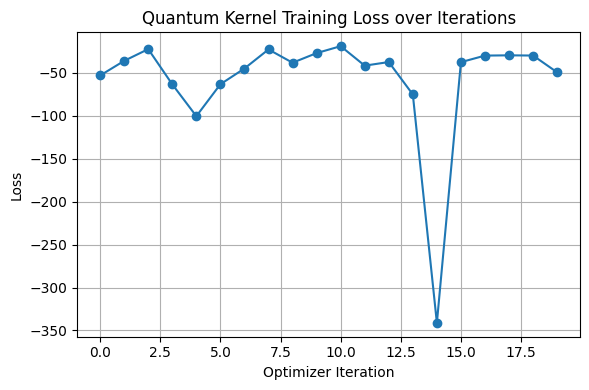

In [ ]:
# Visualizing the kernel training process
# After QKT training has completed:
plt.figure(figsize=(6, 4))
plt.plot(cb_qkt.loss, marker='o')
plt.xlabel('Optimizer Iteration')
plt.ylabel('Loss')
plt.title('Quantum Kernel Training Loss over Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# SVC fit to quantum kernel
from sklearn.metrics import classification_report

svc = SVC(kernel=optimized_kernel.evaluate, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.2667
              precision    recall  f1-score   support

           0       0.17      0.29      0.21         7
           1       0.25      0.12      0.17         8
           2       0.80      0.50      0.62         8
           3       0.11      0.14      0.12         7

    accuracy                           0.27        30
   macro avg       0.33      0.26      0.28        30
weighted avg       0.34      0.27      0.29        30



Active learning starts with a small labeled subset and a large pool of unlabled data. The SVM actively quieries those samples it has the lowest confidence on. KD-tree is used as a proxy oracle to label the yet unlabeled, ambiguous samples, which are then added to training. A proxy oracle is an approximate substitute for the true oracle—often an algorithmic or heuristic method (like KD-tree majority voting) used to generate a label when you don't have access to the true label, or want to minimize labelling cost.

In [ ]:
def kd_tree_correction(X_train, y_train, X_query, k=5):
    """Use KD-tree to locally correct ambiguous QSVM predictions."""
    kd_tree = KDTree(X_train)
    dists, indices = kd_tree.query(X_query, k=k)
    corrected_labels = []
    for neighbors in indices:
        majority_label = np.bincount(y_train[neighbors]).argmax()
        corrected_labels.append(majority_label)
    return np.array(corrected_labels)

In [ ]:
# Find ambiguous samples below threshold query
proba_matrix = svc.predict_proba(X_test)

def find_ambiguous_samples(proba_matrix, threshold=0.75):
  max_proba = np.max(proba_matrix, axis=1)
  ambiguous_indices = np.where(max_proba < threshold)[0]
  return ambiguous_indices

ambiguous_indices = find_ambiguous_samples(proba_matrix)
print(f"Number of ambiguous samples: {len(ambiguous_indices)}")

if (len(ambiguous_indices) == 0):
  print("No ambiguous samples found.")

Number of ambiguous samples: 13


In [ ]:
def active_learning_loop(svc_model, kernel, X_train, y_train, X_test, y_test, X_unlabeled, y_unlabeled, query_batch_size=5, threshold=0.75, k_neighbors=5, max_iterations=10):

    current_X_train = X_train.copy()
    current_y_train = y_train.copy()
    current_X_unlabeled = X_unlabeled.copy()
    current_y_unlabeled = y_unlabeled.copy()

    accuracies = []
    train_sizes = []

    for iteration in range(max_iterations):
        print(f"\n--- Active Learning Iteration {iteration + 1} ---")

        if len(current_X_unlabeled) == 0:
            print("No more unlabeled samples.")
            break

        # Predict probabilities on the current unlabeled pool
        proba_matrix = svc_model.predict_proba(current_X_unlabeled)

        # Find ambiguous samples
        ambiguous_indices = find_ambiguous_samples(proba_matrix, threshold=threshold)

        if len(ambiguous_indices) == 0:
            print("No ambiguous samples found below the threshold.")
            break

        # Select a batch of ambiguous samples to query
        query_indices = ambiguous_indices[:query_batch_size]
        X_query_batch = current_X_unlabeled[query_indices]
        y_query_batch_true = current_y_unlabeled[query_indices] # True labels for the queried batch

        print(f"Querying {len(query_indices)} ambiguous samples.")

        # Apply KD-tree correction to the queried batch
        y_query_batch_corrected = kd_tree_correction(current_X_train, current_y_train, X_query_batch, k=k_neighbors)

        # Add the queried samples (with their true labels) to the training set
        current_X_train = np.vstack((current_X_train, X_query_batch))
        current_y_train = np.concatenate((current_y_train, y_query_batch_corrected))

        # Remove queried samples from the unlabeled pool
        remaining_indices = np.setdiff1d(np.arange(len(current_X_unlabeled)), query_indices)
        current_X_unlabeled = current_X_unlabeled[remaining_indices]
        current_y_unlabeled = current_y_unlabeled[remaining_indices]

        print(f"Training set size: {len(current_X_train)}")
        print(f"Unlabeled pool size: {len(current_X_unlabeled)}")

        # Retrain the SVM model with the updated training set
        # Re-initialize and train the SVC model
        svc_model = SVC(kernel=kernel.evaluate, probability=True)
        svc_model.fit(current_X_train, current_y_train)

        # Predict and evaluate accuracy on the test set
        y_pred = svc_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy after iteration {iteration + 1}: {acc:.4f}")

        accuracies.append(acc)
        train_sizes.append(len(current_X_train))

    return accuracies, train_sizes, svc_model # Return the final trained model as well

In [ ]:

# Step 1 — From your *training set*, carve out an initial labeled subset
initial_train_size = 30  # e.g., start with 50 labeled points
X_train_init, X_pool, y_train_init, y_pool = train_test_split(
    X_train, y_train,
    train_size=initial_train_size,
    stratify=y_train,
    random_state=42
)

In [ ]:
# Example usage of active learning loop
accuracies, train_sizes, final_svc_model = active_learning_loop(
    svc_model=svc,
    kernel=optimized_kernel,
    X_train=X_train_init,
    y_train=y_train_init,
    X_test=X_test,
    y_test=y_test,
    X_unlabeled=X_pool,
    y_unlabeled=y_pool,
    query_batch_size=5,
    threshold=0.75,
    k_neighbors=5,
    max_iterations=10
)


--- Active Learning Iteration 1 ---
Querying 5 ambiguous samples.
Training set size: 35
Unlabeled pool size: 10
Accuracy after iteration 1: 0.7333

--- Active Learning Iteration 2 ---
Querying 5 ambiguous samples.
Training set size: 40
Unlabeled pool size: 5
Accuracy after iteration 2: 0.7333

--- Active Learning Iteration 3 ---
Querying 5 ambiguous samples.
Training set size: 45
Unlabeled pool size: 0
Accuracy after iteration 3: 0.7333

--- Active Learning Iteration 4 ---
No more unlabeled samples.


In [ ]:
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def kd_tree_classify_accuracy(X_train, y_train, X_test, y_test, k=5):
    # Build KD-tree on training data
    kd_tree = KDTree(X_train)

    # Query k nearest neighbors for each test sample
    dist, indices = kd_tree.query(X_test, k=k)

    # Predict by majority vote of neighbors
    y_pred = []
    for neighbor_idxs in indices:
        neighbor_labels = y_train[neighbor_idxs]
        # majority vote
        vals, counts = np.unique(neighbor_labels, return_counts=True)
        majority_label = vals[np.argmax(counts)]
        y_pred.append(majority_label)

    y_pred = np.array(y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"KD-tree k-NN classifier accuracy (k={k}): {acc:.4f}")
    print(classification_report(y_test, y_pred))
    return acc, y_pred

# Example usage:
kd_acc, kd_preds = kd_tree_classify_accuracy(X_train, y_train, X_test, y_test, k=5)

KD-tree k-NN classifier accuracy (k=5): 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

